<a href="https://colab.research.google.com/gist/pouyahosseinzadeh/151ae632122e0405bc24a8a9171bd5e9/icmla-sep_100mev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METFORC

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from sktime.classification.interval_based import TimeSeriesForestClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
import random

In [ ]:
!pip install tsfresh
!pip install sktime
!pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.0 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
from sktime.classification.kernel_based import RocketClassifier

In [ ]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier


In [ ]:
my_image_length = 60
span= 60

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df_B = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df = pd.concat([SEP_df_A, SEP_df_B], axis=1)
SEP_df.columns = range(SEP_df.columns.size)
SEP_df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.0,0.000000,0.0,1517.5963,0.000000,1522.7899,0.0,1381.5040,0.0,0.0,...,0.004990,0.005160,0.004790,0.005240,0.005060,0.004860,0.005550,0.005060,0.006300,0.005400
1,0.0,0.000000,0.0,1518.5792,0.000000,1523.9524,0.0,1382.6090,0.0,0.0,...,0.004420,0.004270,0.004340,0.004940,0.004650,0.004990,0.006140,0.003890,0.004190,0.004700
2,0.0,0.000000,0.0,1759.7799,0.000000,1766.4614,0.0,1594.8754,0.0,0.0,...,0.004120,0.003980,0.004270,0.005010,0.005010,0.003880,0.003370,0.004490,0.004560,0.004940
3,0.0,0.061787,0.0,1754.9634,0.000000,1761.4526,0.0,1591.3519,0.0,0.0,...,0.004420,0.003670,0.003910,0.004420,0.005310,0.004050,0.004650,0.004270,0.003370,0.004780
4,0.0,0.000000,0.0,1697.8419,0.000000,1704.0801,0.0,1539.8455,0.0,0.0,...,0.004560,0.005010,0.004710,0.005710,0.004940,0.004490,0.003890,0.003620,0.003740,0.004710
5,0.0,0.040113,0.0,1814.0172,0.025603,1820.8508,0.0,1642.4237,0.0,0.0,...,0.004420,0.003970,0.003980,0.003440,0.003970,0.003670,0.004480,0.004650,0.004420,0.004850
6,0.0,0.000000,0.0,1820.9634,0.000000,1827.8184,0.0,1648.8876,0.0,0.0,...,0.002470,0.002620,0.002530,0.002390,0.002240,0.002100,0.003070,0.002390,0.002390,0.002170
7,0.0,0.057827,0.0,1911.3760,0.000000,1918.3344,0.0,1730.7010,0.0,0.0,...,0.002840,0.002390,0.002390,0.002920,0.002920,0.002100,0.002240,0.003290,0.001950,0.002690
8,0.0,0.114822,0.0,1956.7384,0.000000,1963.9395,0.0,1771.0482,0.0,0.0,...,0.002820,0.002170,0.002920,0.002390,0.002890,0.003220,0.002100,0.002680,0.002540,0.002690
9,0.0,0.000000,0.0,1952.7772,0.000000,1960.0188,0.0,1767.5907,0.0,0.0,...,0.002390,0.002820,0.003070,0.002390,0.002390,0.003330,0.002920,0.002690,0.002460,0.003440


In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
NSEP_df_78_B = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.concat([NSEP_df_78_A, NSEP_df_78_B], axis=1)
NSEP_df_78.columns = range(NSEP_df_78.columns.size)
NSEP_df_78

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.0,0.000000,0.0,1496.1039,0.000000,1501.2117,0.000000,1362.0897,0.0,0.0,...,0.00485,0.00630,0.00583,0.00644,0.00494,0.00501,0.00564,0.00644,0.00681,0.00494
1,0.0,0.000000,0.0,1510.7189,0.000000,1515.9905,0.000000,1375.3407,0.0,0.0,...,0.00521,0.00546,0.00555,0.00593,0.00531,0.00561,0.00615,0.00575,0.00621,0.00397
2,0.0,0.000000,0.0,1559.3667,0.000000,1564.7730,0.000000,1418.6622,0.0,0.0,...,0.00427,0.00434,0.00521,0.00635,0.00516,0.00555,0.00419,0.00479,0.00456,0.00535
3,0.0,0.000000,0.0,1550.9269,0.000000,1556.2100,0.000000,1410.9813,0.0,0.0,...,0.00600,0.00569,0.00471,0.00521,0.00486,0.00516,0.00569,0.00579,0.00465,0.00540
4,0.0,0.000000,0.0,1683.2325,0.000000,1689.3219,0.000000,1527.6971,0.0,0.0,...,0.00404,0.00521,0.00456,0.00404,0.00546,0.00485,0.00456,0.00569,0.00470,0.00382
5,0.0,0.029491,0.0,1762.4900,0.000000,1769.0020,0.000000,1597.8868,0.0,0.0,...,0.00419,0.00494,0.00593,0.00486,0.00479,0.00449,0.00485,0.00479,0.00434,0.00420
6,0.0,0.000000,0.0,1697.8419,0.000000,1704.0801,0.000000,1539.8455,0.0,0.0,...,0.00456,0.00485,0.00555,0.00465,0.00448,0.00486,0.00427,0.00427,0.00347,0.00359
7,0.0,0.000000,0.0,1781.6700,0.000000,1788.0598,0.000000,1615.0494,0.0,0.0,...,0.00528,0.00404,0.00442,0.00569,0.00333,0.00374,0.00449,0.00478,0.00397,0.00344
8,0.0,0.000000,0.0,1765.7059,0.000000,1772.2808,0.000000,1599.5607,0.0,0.0,...,0.00427,0.00471,0.00501,0.00564,0.00465,0.00486,0.00391,0.00382,0.00382,0.00376
9,0.0,0.000000,0.0,1887.9163,0.000000,1894.9899,0.000000,1709.5980,0.0,0.0,...,0.00449,0.00420,0.00546,0.00442,0.00506,0.00509,0.00465,0.00322,0.00434,0.00486


In [ ]:
data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes

<ipython-input-16-d521cdc2284f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,event
0,0.0,0.000000,0.0,1517.5963,0.0,1522.7899,0.000000,1381.5040,0.0,0.0,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
1,0.0,0.000000,0.0,1518.5792,0.0,1523.9524,0.000000,1382.6090,0.0,0.0,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
2,0.0,0.000000,0.0,1759.7799,0.0,1766.4614,0.000000,1594.8754,0.0,0.0,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
3,0.0,0.061787,0.0,1754.9634,0.0,1761.4526,0.000000,1591.3519,0.0,0.0,...,0.00367,0.00391,0.00442,0.00531,0.00405,0.00465,0.00427,0.00337,0.00478,SEP
4,0.0,0.000000,0.0,1697.8419,0.0,1704.0801,0.000000,1539.8455,0.0,0.0,...,0.00501,0.00471,0.00571,0.00494,0.00449,0.00389,0.00362,0.00374,0.00471,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.004296,0.0,1930.5219,0.0,1937.8096,0.021121,1747.4928,0.0,0.0,...,0.00333,0.00299,0.00277,0.00369,0.00277,0.00314,0.00277,0.00231,0.00359,NSEP
92,0.0,0.070770,0.0,1945.6710,0.0,1952.9968,0.000000,1761.3417,0.0,0.0,...,0.00262,0.00359,0.00268,0.00382,0.00314,0.00282,0.00292,0.00150,0.00292,NSEP
93,0.0,0.029904,0.0,1915.8229,0.0,1923.0168,0.000000,1734.9430,0.0,0.0,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
94,0.0,0.011149,0.0,1874.6545,0.0,1881.6160,0.000000,1697.9891,0.0,0.0,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all.pop('event')
X1 = my_data_all

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

# y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
def count_elements(lst):
    count_less = 0
    count_greater = 0

    for num in lst:
        if num < 79:
            count_less += 1
        elif num > 79:
            count_greater += 1

    return count_less > count_greater

In [ ]:
import random
from statistics import mean


# num_iteration = 10  # CHANGED!!!
def random_segmentation(arr, num_segments, ts_seq_length, num_iter):
    segments = []
    # num_segments = len(arr) // 40  # Number of segments to create
    indice_x_all = []
    for indice_x in range(num_iter):
        my_indices = list(range(ts_seq_length))

        # Reset the seed
        import importlib
        importlib.reload(random)

        new_indices = random.sample(my_indices, num_segments)
        my_new_indices = new_indices.copy()
        new_indices.sort()
        segment = np.array(arr)[new_indices]
        segments.append(segment)

        # print(my_new_indices)
        result = count_elements(my_new_indices)
        # print(my_new_indices)
        # print(result)
        if result == True:
          indice_x_all.append(indice_x)

    return segments, indice_x_all

In [ ]:
accuracy_complete = []
f1_complete = []
precision_complete = []
recall_complete = []
TSS_complete = []
HSS_complete = []
num_iteration = [5, 10, 15, 20, 25, 30, 35, 40]  # CHANGED!!!
for my_number in num_iteration:


  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  accuracy_all = []
  f1_all = []
  precision_all = []
  recall_all = []
  TSS_all = []
  HSS_all = []

  index = 0
  for train_index, test_index in skf.split(X1, y1):
      index = index + 1
      X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
      y_train1, y_test1 = y1[train_index], y1[test_index]


      X_train1 = np.array(X_train1)
      X_test1 = np.array(X_test1)
      y_train1 = np.array(y_train1)
      y_test1 = np.array(y_test1)


      from sklearn.preprocessing import StandardScaler
      trans = StandardScaler()
      X_train1 = trans.fit_transform(X_train1)
      X_test1 = trans.transform(X_test1)


      # X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
      # y_train2, y_test2 = y2[train_index], y2[test_index]


      # X_train2 = np.array(X_train2)
      # X_test2 = np.array(X_test2)
      # y_train2 = np.array(y_train2)
      # y_test2 = np.array(y_test2)



      segments_all1 = []
      for i in range(X_train1.shape[0]):
        array_ori_ = X_train1[i]
        array = array_ori_.copy()
        array1 = array.tolist()
        # num_segments1 = 110
        num_segments1 = span + my_image_length - 10
        segments1, my_ts_indices = random_segmentation(array1, num_segments1, span + my_image_length, my_number)
        segments_all1.append(segments1)

      segments_all1_test = []
      for ii in range(X_test1.shape[0]):
        array_ori_ = X_test1[ii]
        array = array_ori_.copy()
        array1 = array.tolist()
        num_segments1 = span + my_image_length - 10
        segments1, my_ts_indices = random_segmentation(array1, num_segments1, span + my_image_length, my_number)
        segments_all1_test.append(segments1)


      ts_pred_all = []
      npy_segments1 = np.asarray(segments_all1)
      for j in range(my_number):

        ts_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
        ts_classifier.fit(npy_segments1[: , j], y_train1)
        # ts_pred = ts_classifier.predict_proba(np.array(segments_all1).reshape(X_test1.shape[0], num_segments1))
        ts_pred = ts_classifier.predict_proba(npy_segments1[: , j])
        ts_pred_all.append(y_train1)

      # r_train = np.array(ts_pred_all)[:, :, 0]
      r = np.array(ts_pred_all)
      r_train = r.T
      from sklearn.tree import DecisionTreeClassifier
      # Create the decision tree classifier
      # classifier = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, random_state=42)
      classifier = DecisionTreeClassifier(random_state=42)
      classifier.fit(r_train, y_train1)




      # accuracy_part = []
      # f1_part = []
      # precision_part = []
      # recall_part = []
      # TSS_part = []
      # HSS_part = []
      ts_pred_all_test = []
      npy_segments1_test = np.asarray(segments_all1_test)
      for p in range(my_number):

        ts_pred = ts_classifier.predict_proba(npy_segments1_test[: , p])
        ts_pred_all_test.append(ts_pred[:, 1])

      # r_train = np.array(ts_pred_all)[:, :, 0]
      c = np.array(ts_pred_all_test)
      # b = a[:, :, 1]
      c_test = c.T
      y_pred = classifier.predict(c_test)


      accuracy_ = accuracy_score(y_pred, y_test1)  # y_test1 or y_test2 ... No matter
      f1_ = f1_score(y_pred, y_test1, average = 'macro')  # , average="weighted"
      precision_ = precision_score(y_pred, y_test1, average = 'macro')
      recall_ = recall_score(y_pred, y_test1, average = 'macro')
      tn, fp, fn, tp = confusion_matrix(y_pred, y_test1).ravel()
      TSS_ = (tp/(tp+fn)) - (fp/(fp+tn))
      HSS_ = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))

      accuracy_all.append(accuracy_)
      f1_all.append(f1_)
      precision_all.append(precision_)
      recall_all.append(recall_)
      TSS_all.append(TSS_)
      HSS_all.append(HSS_)


  accuracy_complete.append(round(np.mean(accuracy_all), 2))
  f1_complete.append(round(np.mean(f1_all), 2))
  precision_complete.append(round(np.mean(precision_all), 2))
  recall_complete.append(round(np.mean(recall_all), 2))
  TSS_complete.append(round(np.mean(TSS_all), 2))
  HSS_complete.append(round(np.mean(HSS_all), 2))






In [ ]:
accuracy_all_Approach2 = accuracy_all
accuracy_all_Approach2

[0.85,
 0.8421052631578947,
 0.8947368421052632,
 0.8421052631578947,
 0.8421052631578947]

In [ ]:
accuracy_all_Approach2_m = round(np.mean(accuracy_all_Approach2), 2)
accuracy_all_Approach2_m

0.85

In [ ]:
accuracy_complete

[0.86, 0.84, 0.83, 0.84, 0.83, 0.83, 0.82, 0.85]

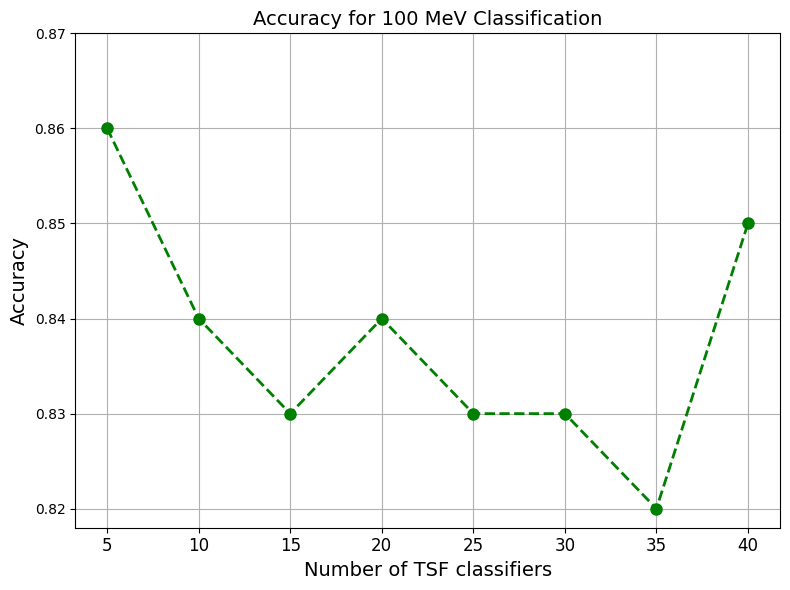

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of values
values = accuracy_complete

# List of corresponding x-axis labels
x_labels = ['5', '10', '15', '20', '25', '30', '35', '40']

# Generate x-axis values
x = range(len(values))

# Plotting the values with a thicker dashed line and circular markers
plt.plot(x, values, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')

# Adding labels and title
plt.xlabel('Number of TSF classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy for 100 MeV Classification', fontsize=14)

# Setting x-axis tick labels and font size
plt.xticks(x, x_labels, fontsize=12)

# Formatting y-axis labels to two decimal places
plt.yticks(np.arange(min(values), max(values) + 0.01, 0.01).round(2))

# Adding grid lines
plt.grid(True)

# Adjusting figure size and margins
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()

# Save the figure as a high-quality PDF file
plt.savefig('Curve-Accuracy.pdf', dpi=300)

# Display the plot
plt.show()


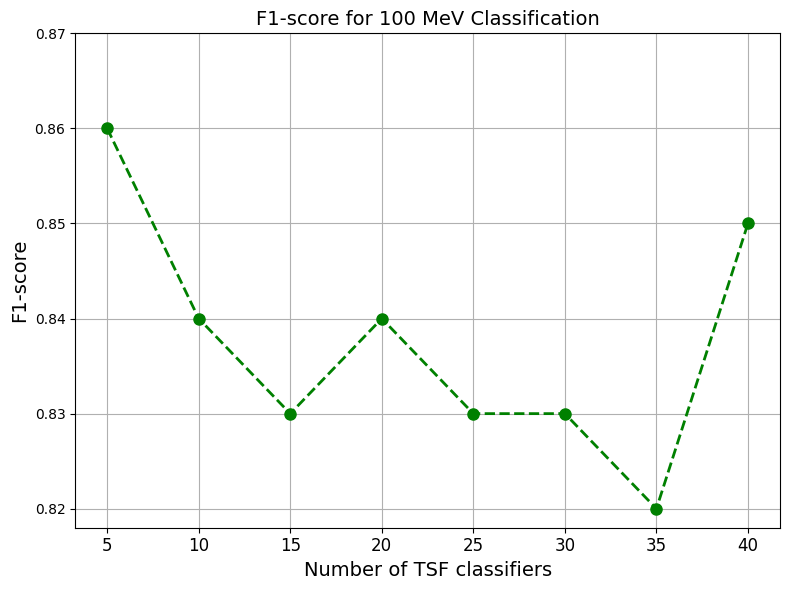

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of values
values = f1_complete

# List of corresponding x-axis labels
x_labels = ['5', '10', '15', '20', '25', '30', '35', '40']

# Generate x-axis values
x = range(len(values))

# Plotting the values with a thicker dashed line and circular markers
plt.plot(x, values, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')

# Adding labels and title
plt.xlabel('Number of TSF classifiers', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.title('F1-score for 100 MeV Classification', fontsize=14)

# Setting x-axis tick labels and font size
plt.xticks(x, x_labels, fontsize=12)

# Formatting y-axis labels to two decimal places
plt.yticks(np.arange(min(values), max(values) + 0.01, 0.01).round(2))

# Adding grid lines
plt.grid(True)

# Adjusting figure size and margins
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()

# Save the figure as a high-quality PDF file
plt.savefig('Curve-F1.pdf', dpi=300)

# Display the plot
plt.show()


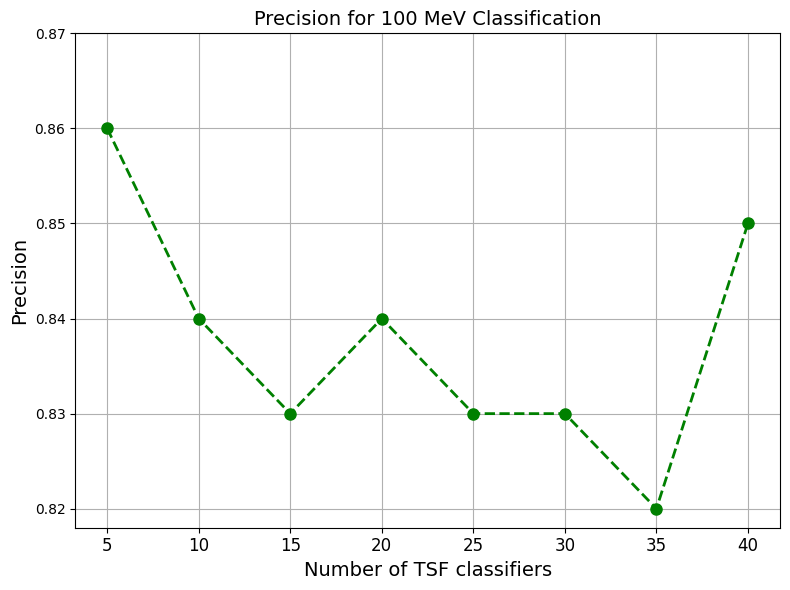

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of values
values = precision_complete

# List of corresponding x-axis labels
x_labels = ['5', '10', '15', '20', '25', '30', '35', '40']

# Generate x-axis values
x = range(len(values))

# Plotting the values with a thicker dashed line and circular markers
plt.plot(x, values, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')

# Adding labels and title
plt.xlabel('Number of TSF classifiers', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision for 100 MeV Classification', fontsize=14)

# Setting x-axis tick labels and font size
plt.xticks(x, x_labels, fontsize=12)

# Formatting y-axis labels to two decimal places
plt.yticks(np.arange(min(values), max(values) + 0.01, 0.01).round(2))

# Adding grid lines
plt.grid(True)

# Adjusting figure size and margins
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()

# Save the figure as a high-quality PDF file
plt.savefig('Curve-Precision.pdf', dpi=300)

# Display the plot
plt.show()


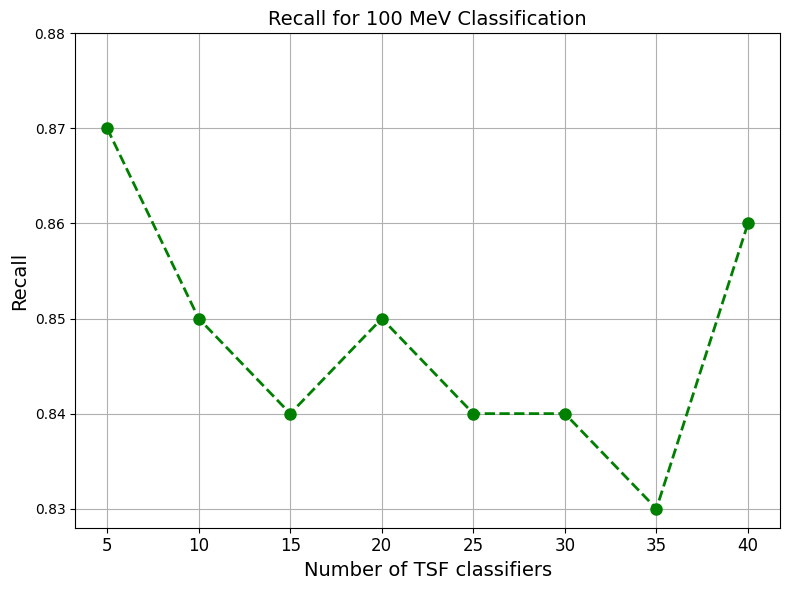

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of values
values = recall_complete

# List of corresponding x-axis labels
x_labels = ['5', '10', '15', '20', '25', '30', '35', '40']

# Generate x-axis values
x = range(len(values))

# Plotting the values with a thicker dashed line and circular markers
plt.plot(x, values, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')

# Adding labels and title
plt.xlabel('Number of TSF classifiers', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.title('Recall for 100 MeV Classification', fontsize=14)

# Setting x-axis tick labels and font size
plt.xticks(x, x_labels, fontsize=12)

# Formatting y-axis labels to two decimal places
plt.yticks(np.arange(min(values), max(values) + 0.01, 0.01).round(2))

# Adding grid lines
plt.grid(True)

# Adjusting figure size and margins
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()

# Save the figure as a high-quality PDF file
plt.savefig('Curve-Recall.pdf', dpi=300)

# Display the plot
plt.show()


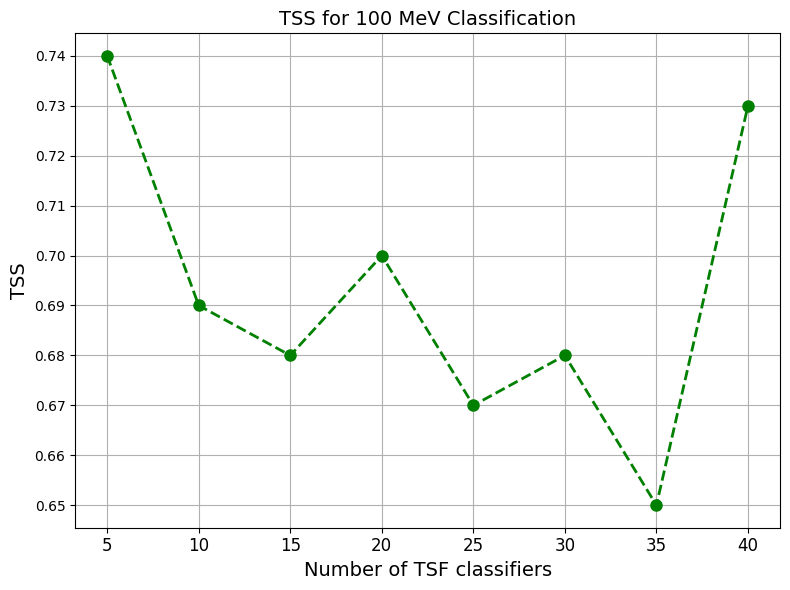

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of values
values = TSS_complete

# List of corresponding x-axis labels
x_labels = ['5', '10', '15', '20', '25', '30', '35', '40']

# Generate x-axis values
x = range(len(values))

# Plotting the values with a thicker dashed line and circular markers
plt.plot(x, values, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')

# Adding labels and title
plt.xlabel('Number of TSF classifiers', fontsize=14)
plt.ylabel('TSS', fontsize=14)
plt.title('TSS for 100 MeV Classification', fontsize=14)

# Setting x-axis tick labels and font size
plt.xticks(x, x_labels, fontsize=12)

# Formatting y-axis labels to two decimal places
plt.yticks(np.arange(min(values), max(values) + 0.01, 0.01).round(2))

# Adding grid lines
plt.grid(True)

# Adjusting figure size and margins
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()

# Save the figure as a high-quality PDF file
plt.savefig('Curve-TSS.pdf', dpi=300)

# Display the plot
plt.show()


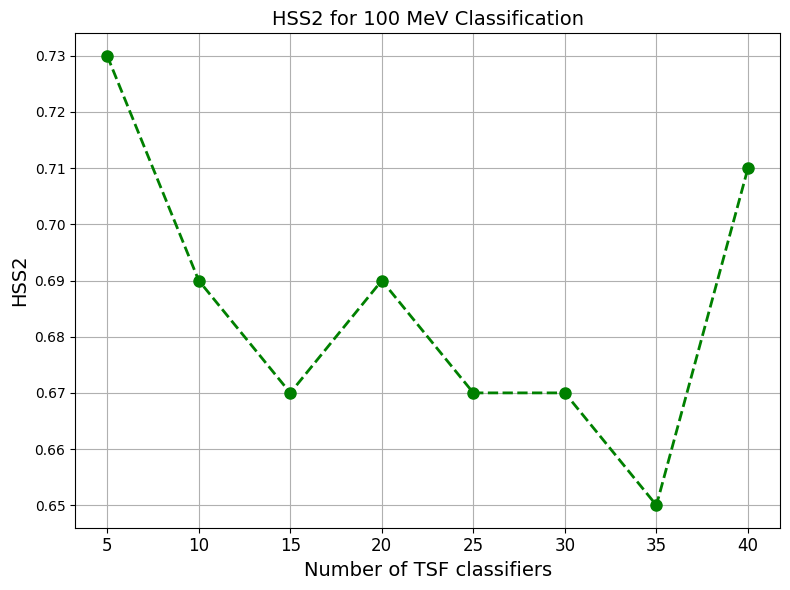

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of values
values = HSS_complete

# List of corresponding x-axis labels
x_labels = ['5', '10', '15', '20', '25', '30', '35', '40']

# Generate x-axis values
x = range(len(values))

# Plotting the values with a thicker dashed line and circular markers
plt.plot(x, values, marker='o', linestyle='--', linewidth=2, markersize=8, color='green')

# Adding labels and title
plt.xlabel('Number of TSF classifiers', fontsize=14)
plt.ylabel('HSS2', fontsize=14)
plt.title('HSS2 for 100 MeV Classification', fontsize=14)

# Setting x-axis tick labels and font size
plt.xticks(x, x_labels, fontsize=12)

# Formatting y-axis labels to two decimal places
plt.yticks(np.arange(min(values), max(values) + 0.01, 0.01).round(2))

# Adding grid lines
plt.grid(True)

# Adjusting figure size and margins
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.tight_layout()

# Save the figure as a high-quality PDF file
plt.savefig('Curve-HSS.pdf', dpi=300)

# Display the plot
plt.show()
